In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


/usr/local/lib/python3.12/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Step 1: Load the Dataset
data_url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(data_url)

In [4]:
# Step 2: Explore the Data
print("Dataset Preview:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe())


Dataset Preview:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  


In [5]:
# Step 3: Data Preprocessing (Normalize and Handle Missing Values)
df.fillna(df.median(), inplace=True)  # Fill missing values with median
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])  # Normalize numerical features


/tmp/ipykernel_247822/1630072539.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.63994726 -0.84488505  1.23388019 -0.84488505 -1.14185152  0.3429808
 -0.25095213  1.82781311 -0.54791859  1.23388019  0.04601433  1.82781311
  1.82781311 -0.84488505  0.3429808   0.93691372 -1.14185152  0.93691372
 -0.84488505 -0.84488505 -0.25095213  1.23388019  0.93691372  1.53084665
  2.12477957  1.82781311  0.93691372 -0.84488505  2.7187125   0.3429808
  0.3429808  -0.25095213 -0.25095213  0.63994726  1.82781311  0.04601433
  2.12477957  1.53084665 -0.54791859  0.04601433 -0.25095213  0.93691372
  0.93691372  1.53084665  0.93691372 -1.14185152 -0.84488505 -0.54791859
  0.93691372  0.93691372 -0.84488505 -0.84488505  0.3429808   1.23388019
  0.93691372 -0.84488505  0.93691372 -1.14185152 -1.14185152 -1.14185152
 -0.54791859  1.23388019  0.3429808  -0.54791859  0.93691372  0.3429808
 -1.14185152 -0.54791859 -0.84488505  0.046

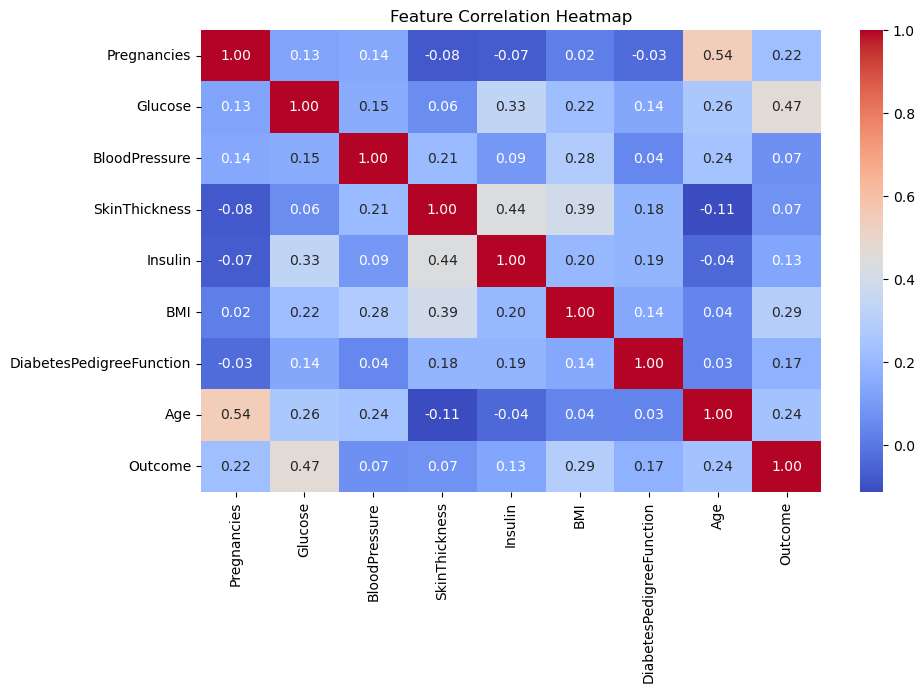

In [6]:
# Step 4: Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()